In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from surprise import SVD
from surprise import BaselineOnly
from surprise import SlopeOne
from surprise import NormalPredictor
from surprise import Reader
from surprise import Dataset

from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split
from surprise.model_selection import GridSearchCV
from surprise import accuracy


## Loading the data set

In [2]:
df = pd.read_pickle('df_rats.pkl')

In [3]:
df

,user_id,book_id,rating,best_book_id
0,8842281e1d1347389f2ab93d60773d4d,22034,5,22034
1,bafc2d50014200cda7cb2b6acd60cd73,22034,5,22034
2,0ef32090550901ead25cb0ea21c4d36b,22034,4,22034
3,8489357f2f485c1a961d4cbdc54ea84b,22034,3,22034
4,623103c8b74b4e97b2077ff2fd33514b,22034,4,22034
...,...,...,...,...
10505812,f099c0c488290d550eff5200c64a3094,17853378,5,17853378
10505813,249f280eaa2398cab3e64faa2fd5f236,5709901,3,5709901
10505814,be6f3f764f0a4b665673671f177949d1,16075973,4,16075973
10505815,b82f3bff7672ffb52a0da25a9194c79d,6687280,4,6687280


In [4]:
df.drop(columns=['best_book_id'],inplace = True)

In [5]:
reader = Reader(rating_scale=(0, 5))
data = Dataset.load_from_df(df[['user_id', 'book_id', 'rating']], reader)

In [7]:
train,test = train_test_split(data, test_size=0.2, random_state=47)

In [8]:
predict_NP = NormalPredictor().fit(train).test(test)

In [11]:
accuracy.rmse(predict_NP)

RMSE: 1.7230


1.7230345283942123

In [12]:
predict_bo_als = BaselineOnly().fit(train).test(test)

Estimating biases using als...


In [13]:
accuracy.rmse(predict_bo_als)

RMSE: 1.1219


1.121923214371969

In [15]:
predict_bo_sgd = BaselineOnly(bsl_options = {'method': 'sgd'}).fit(train).test(test)

Estimating biases using sgd...


In [16]:
accuracy.rmse(predict_bo_sgd)

RMSE: 1.1200


1.1199682065610777

In [17]:
predict_svd = SVD().fit(train).test(test)

In [18]:
accuracy.rmse(predict_svd)

RMSE: 1.1199


1.1198826510943596

In [19]:
algorithms = ['NormalPredictor', 'BaselineOnly_als', 'BaselineOnly_sgd', 'SVD']

In [22]:
RMSE = [accuracy.rmse(predict_NP),accuracy.rmse(predict_bo_als),accuracy.rmse(predict_bo_sgd),accuracy.rmse(predict_svd)]

RMSE: 1.7230
RMSE: 1.1219
RMSE: 1.1200
RMSE: 1.1199


In [23]:
MSE = [accuracy.mse(predict_NP),accuracy.mse(predict_bo_als),accuracy.mse(predict_bo_sgd),accuracy.mse(predict_svd)]

MSE: 2.9688
MSE: 1.2587
MSE: 1.2543
MSE: 1.2541


In [24]:
MAE = [accuracy.mae(predict_NP),accuracy.mae(predict_bo_als),accuracy.mae(predict_bo_sgd),accuracy.mae(predict_svd)]

MAE:  1.3388
MAE:  0.8153
MAE:  0.8190
MAE:  0.8019


In [34]:
metrics = pd.DataFrame(index=algorithms)

In [37]:
metrics[0] = RMSE
metrics[1] = MSE
metrics[2] = MAE

In [39]:
metrics.columns = ['RMSE', 'MSE', 'MAE']

In [40]:
metrics

,RMSE,MSE,MAE
NormalPredictor,1.723035,2.968848,1.338751
BaselineOnly_als,1.121923,1.258712,0.815304
BaselineOnly_sgd,1.119968,1.254329,0.818951
SVD,1.119883,1.254137,0.801898


In [41]:
metrics.to_csv('metricsfile.csv')

BaselineOnly and SVD are very close performers, but BaselineOnly is much less computataionlly expensive so we will move forward with that one. 

In [7]:
reader = Reader(rating_scale=(0, 5))
data = Dataset.load_from_df(df[['user_id', 'book_id', 'rating']], reader)

In [12]:
train,test = train_test_split(data, test_size=0.2, random_state=47)

In [ ]:
# Tested: n_epochs 12,18 and reg 0.02, 0.01. both had RMSE of 1.12, higher than standard params

In [75]:
bsl_options = {'method': 'sgd',
               'reg':0.5,
               'learning_rate': .005,
               'n_epochs': 25
               }

In [76]:
model_sgd = BaselineOnly(bsl_options = bsl_options).fit(train)

Estimating biases using sgd...


In [77]:
preds = model_sgd.test(test)

In [78]:
parms_500525 = accuracy.rmse(preds)

RMSE: 1.1331


In [79]:
parms_500525

1.1330510475375668

In [38]:
Standard_params = accuracy.rmse(preds)

RMSE: 1.1219


In [44]:
parms_010512

1.1578101439212658

In [50]:
parms_0100512

1.1888492258562413

In [56]:
parms_0100520

1.1200360449938294

In [62]:
parms_0100525

1.1184975433756525

In [68]:
parms_0200525

1.118403698114278

In [74]:
parms_0300525

1.1183417981586508

In [80]:
parms_500525

1.1330510475375668

In [81]:
parms_0300525

1.1183417981586508

In [6]:
bsl_best = {'method': 'sgd',
               'reg':0.03,
               'learning_rate': .005,
               'n_epochs': 25
               }

In [7]:
train1,test1 = train_test_split(data, test_size=0.2, random_state=40)
#train2,test2 = train_test_split(data, test_size=0.2, random_state=13)
#train3,test3 = train_test_split(data, test_size=0.2, random_state=25)

In [8]:
algo_best = BaselineOnly(bsl_options = bsl_best)

In [9]:
model = algo_best.fit(train1)

Estimating biases using sgd...


In [10]:
predictions = model.test(test1)

In [11]:
pred_df = pd.DataFrame(predictions)

In [ ]:
pred_df.to_pickle('pred_df.pkl')

In [ ]:
rmse = accuracy.rmse(predictions)
mse = accuracy.mse(predictions)
mae = accuracy.mae(predictions)
fcp = accuracy.fcp(predictions)

In [ ]:
metrics_best = pd.DataFrame(index=['RMSE', 'MSE', 'MAE', 'FCP'])

In [ ]:
metrics_best[0] = ([rmse,mse,mae,fcp])

In [ ]:
metrics_best.columns = ['Measurement Value']
metrics_best

In [22]:
metrics_best.to_csv('metrics_best_model.csv')

In [13]:
def get_Iu(uid):
    """ return the number of items rated by given user
    args: 
      uid: the id of the user
    returns: 
      the number of items rated by the user
    """
    try:
        return len(train1.ur[train1.to_inner_uid(uid)])
    except ValueError: # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """ return number of users that have rated given item
    args:
      iid: the raw id of the item
    returns:
      the number of users that have rated the item.
    """
    try: 
        return len(train1.ir[train1.to_inner_iid(iid)])
    except ValueError:
        return 0
    
df = pd.DataFrame(predictions, columns=['user_id', 'book_id', 'user_rating', 'pred_rating', 'details'])
df['NumberBooksRated'] = df.user_id.apply(get_Iu)
df['NumberUsersRated'] = df.book_id.apply(get_Ui)
df['err'] = abs(df.pred_rating - df.user_rating)
df=df[['user_id','NumberBooksRated','book_id','NumberUsersRated','user_rating','pred_rating','err']]
best_predictions = df.sort_values(by='err')[:10]
worst_predictions = df.sort_values(by='err')[-10:]

In [18]:
best_predictions

,user_id,NumberBooksRated,book_id,NumberUsersRated,user_rating,pred_rating,err
1376011,4fef3afa60ade8c236bc4df9becb9634,105,109367,2146,5.0,5.0,0.0
1210490,99dffbb50bd4b9fcd2def5e15892fd6b,644,102916,474,5.0,5.0,0.0
609069,2befe9e8779e20ecc25756c4442e0187,29,33816696,311,0.0,0.0,0.0
777233,fab365ded22c794af85618a6e85c2c41,364,291340,129,5.0,5.0,0.0
356809,e3bfa08e0060220527558a18d80ceefd,142,76867,1976,5.0,5.0,0.0
1041088,0cc9fa7d133b1f9aa821dad0b265cf3b,52,599957,652,5.0,5.0,0.0
687624,e7e3b0384e2faca2d563d90e68bc3354,35,2277444,1644,5.0,5.0,0.0
198367,be7f617080963fcd10fc3419ea35a26e,72,439092,438,5.0,5.0,0.0
382187,c610c52a15a312aeb73e4408ee0cb380,38,79885,7234,5.0,5.0,0.0
1772641,a7109a9fe1ea8d7bdcc6858209991a28,255,18331318,14,5.0,5.0,0.0


In [19]:
worst_predictions

,user_id,NumberBooksRated,book_id,NumberUsersRated,user_rating,pred_rating,err
1246894,200ca22eb70cd0edb565b7c773d1111f,118,830502,9140,5.0,0.0,5.0
1011850,59993e76e7f9608cfb1f25e408bd300c,35,36049900,26,0.0,5.0,5.0
2003772,14b8db41331404b6baea2f8d443067b8,477,17465443,325,0.0,5.0,5.0
155518,2cc9f0371074a92ff67ea3b6c2ec38fe,214,9925913,661,0.0,5.0,5.0
1498764,fa1b5c9dbc318d9cf640f00827199737,33,138683,1157,0.0,5.0,5.0
1781361,5439786704dc1c6e3138752815ed9439,29,27067091,38,0.0,5.0,5.0
434753,626ac05dfbf6998216c8d2465249f9c6,41,775346,3081,5.0,0.0,5.0
1602459,4dafd362fec9f65bdc2716a213483049,82,27206481,88,5.0,0.0,5.0
2015105,33758e6e89fc5e55a53babbbf18c78eb,15,28186363,952,0.0,5.0,5.0
737069,39c62913421731d26384be04da7fddab,55,175244,536,0.0,5.0,5.0


In [ ]:
df_2 = pd.read_pickle('df_rats.pkl')

In [ ]:
df_2.drop(columns=['best_book_id'],inplace = True)

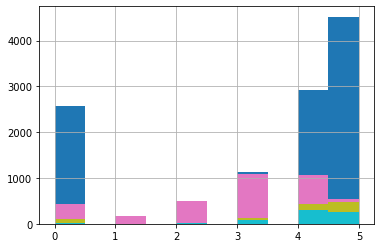

In [42]:
for i in worst_predictions.book_id:
    df_2.rating[df_2.book_id == i].hist()

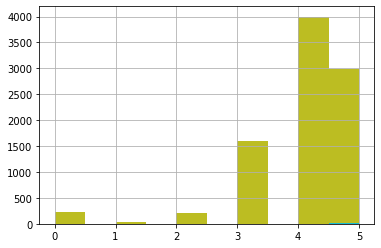

In [43]:
for i in best_predictions.book_id:
    df_2.rating[df_2.book_id == i].hist()

In [46]:
df.err.describe()

count    2.101164e+06
mean     8.173523e-01
std      7.632741e-01
min      0.000000e+00
25%      2.886449e-01
50%      6.109919e-01
75%      1.093019e+00
max      5.000000e+00
Name: err, dtype: float64

<AxesSubplot:xlabel='err', ylabel='Count'>

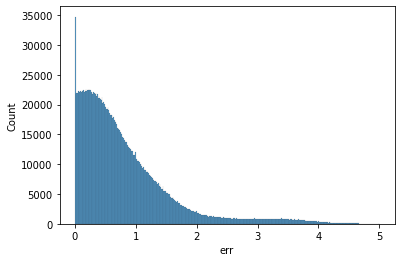

In [47]:
sns.histplot(data=df, x = 'err')

In [48]:
#Looking at error for actual rating > 4

<AxesSubplot:xlabel='err', ylabel='Count'>

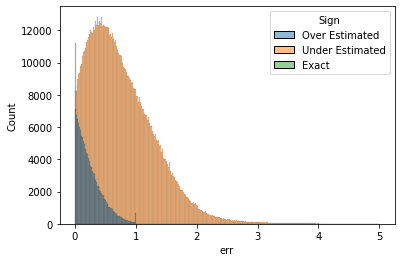

In [65]:
sns.histplot(data = df[df.user_rating >3], x = 'err', hue='Sign')

<AxesSubplot:xlabel='err', ylabel='Count'>

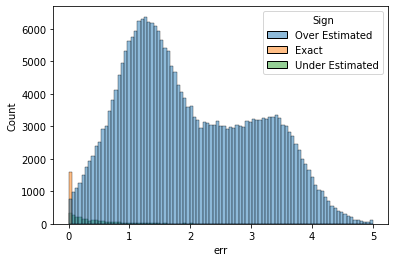

In [66]:
sns.histplot(data = df[df.user_rating <3], x = 'err', hue='Sign')

In [ ]:
df['Sign'] = 'Over Estimated'

In [ ]:
df.Sign[(df.user_rating-df.pred_rating) == 0] = 'Exact'

In [ ]:
df.Sign[(df.user_rating-df.pred_rating) > 0] = 'Under Estimated'

<AxesSubplot:xlabel='user_rating', ylabel='NumberBooksRated'>

/Users/jensensj/miniconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


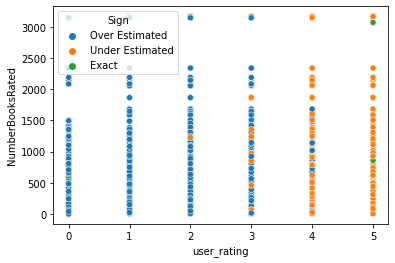

In [70]:
sns.scatterplot(data=df, x='user_rating',y='NumberBooksRated',hue='Sign')

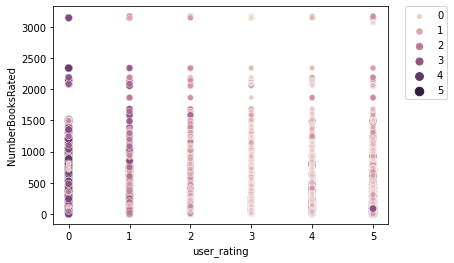

In [73]:
sns.scatterplot(data=df, x='user_rating',y='NumberBooksRated',hue='err', size='err')
plt.legend(bbox_to_anchor = (1.05,1),loc=2,borderaxespad =0.)

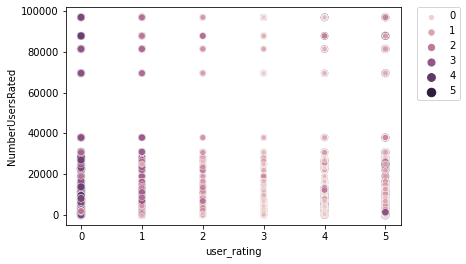

In [20]:
sns.scatterplot(data=df, x='user_rating',y='NumberUsersRated',hue='err', size='err')
plt.legend(bbox_to_anchor = (1.05,1),loc=2,borderaxespad =0.)

In [81]:
df_just0 = df[df.user_rating == 0]

In [ ]:
sns.histplot(data=df_just0, x = 'err', hue='pred_rating')

In [18]:
df.to_pickle('model_results.pkl')

In [17]:
df.head()

,user_id,NumberBooksRated,book_id,NumberUsersRated,user_rating,pred_rating,err
0,648679c737b4ec5e759b9b0bc0852fc7,282,19486439,123,3.0,3.163132,0.163132
1,449ae20f62d03f46e2b4487fa4c8abdf,1043,16244754,385,3.0,3.273710,0.273710
2,501209dbf1919c8bb0a32351385fc883,87,48811,1323,4.0,4.479266,0.479266
3,d5cc645051a5c5f1bd3e09c87de101e8,68,93570,557,4.0,4.423145,0.423145
4,e99bb6c07448bc12d206f8c61c2c3815,16,35432690,24,0.0,0.996197,0.996197


In [21]:
df['pred_round'] = df.pred_rating.round()

In [22]:
df.head()

,user_id,NumberBooksRated,book_id,NumberUsersRated,user_rating,pred_rating,err,pred_round
0,648679c737b4ec5e759b9b0bc0852fc7,282,19486439,123,3.0,3.163132,0.163132,3.0
1,449ae20f62d03f46e2b4487fa4c8abdf,1043,16244754,385,3.0,3.273710,0.273710,3.0
2,501209dbf1919c8bb0a32351385fc883,87,48811,1323,4.0,4.479266,0.479266,4.0
3,d5cc645051a5c5f1bd3e09c87de101e8,68,93570,557,4.0,4.423145,0.423145,4.0
4,e99bb6c07448bc12d206f8c61c2c3815,16,35432690,24,0.0,0.996197,0.996197,1.0


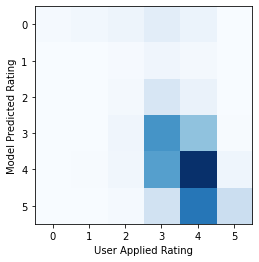

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(df.user_rating, df.pred_round)
plt.imshow(cm, interpolation='none', cmap='Blues')
plt.xlabel('User Applied Rating')
plt.ylabel('Model Predicted Rating')
plt.show()

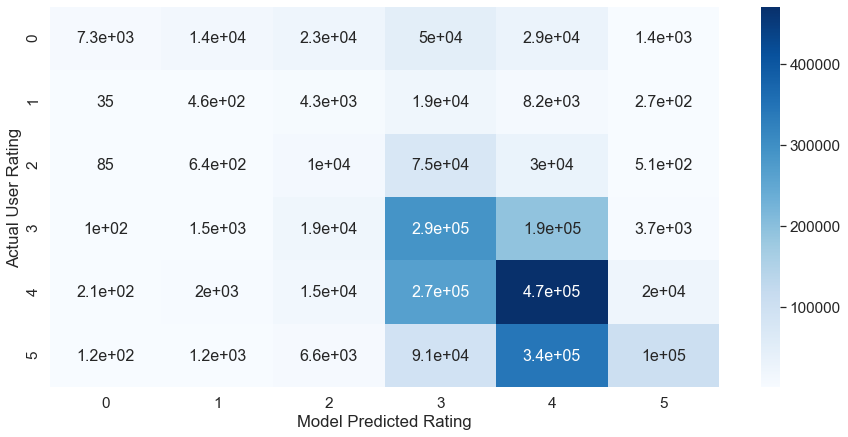

In [50]:
df_cm = pd.DataFrame(cm,range(6),range(6))
plt.figure(figsize=(15,7))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True,annot_kws={'size':16},cmap='Blues')
plt.ylabel('Actual User Rating')
plt.xlabel('Model Predicted Rating')
plt.show()

In [38]:
cm

array([[  7268,  14443,  23127,  49623,  29200,   1412],
       [    35,    462,   4273,  19440,   8199,    266],
       [    85,    639,   9957,  75271,  29698,    513],
       [   104,   1540,  18596, 289123, 192969,   3700],
       [   209,   1976,  14935, 265749, 471364,  20493],
       [   122,   1222,   6620,  90709, 343287, 104535]])

In [39]:
df.user_rating.value_counts()

4.0    774726
5.0    546495
3.0    506032
0.0    125073
2.0    116163
1.0     32675
Name: user_rating, dtype: int64

In [72]:
cm_0 = cm[0]/125073*100

In [73]:
cm_1 = cm[1]/32675*100

In [74]:
cm_2 = cm[2]/116163*100

In [75]:
cm_3 = cm[3]/506032*100

In [76]:
cm_4 = cm[4]/774726*100

In [77]:
cm_5 = cm[5]/546495*100

In [78]:
cm_p = np.append([cm_0,cm_1,cm_2,cm_3,cm_4], [cm_5],axis=0)

In [79]:
cm_p

array([[5.81100637e+00, 1.15476562e+01, 1.84908014e+01, 3.96752297e+01,
        2.33463657e+01, 1.12894070e+00],
       [1.07115532e-01, 1.41392502e+00, 1.30772762e+01, 5.94950268e+01,
        2.50925784e+01, 8.14078041e-01],
       [7.31730413e-02, 5.50089099e-01, 8.57157615e+00, 6.47977411e+01,
        2.55657998e+01, 4.41620826e-01],
       [2.05520599e-02, 3.04328580e-01, 3.67486641e+00, 5.71353195e+01,
        3.81337544e+01, 7.31179056e-01],
       [2.69772797e-02, 2.55057917e-01, 1.92777834e+00, 3.43023211e+01,
        6.08426721e+01, 2.64519327e+00],
       [2.23240835e-02, 2.23606803e-01, 1.21135601e+00, 1.65983220e+01,
        6.28161282e+01, 1.91282628e+01]])

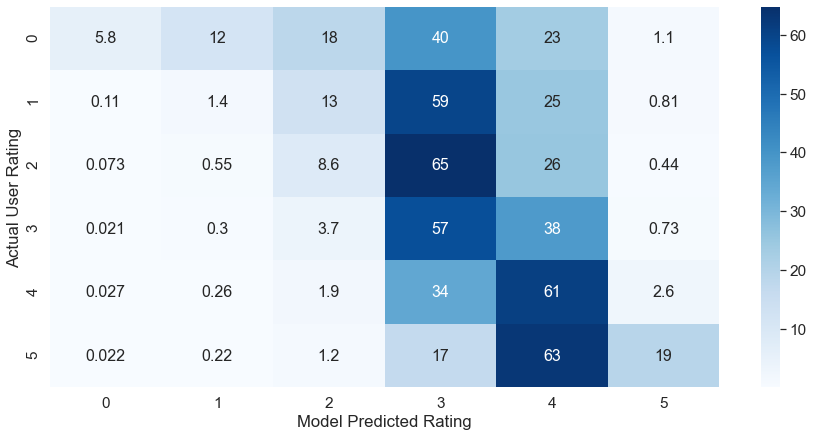

In [80]:
df_cm = pd.DataFrame(cm_p,range(6),range(6))
plt.figure(figsize=(15,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={'size':16},cmap='Blues')
plt.ylabel('Actual User Rating')
plt.xlabel('Model Predicted Rating')
plt.show()